homework 5
---
due: April 24 2022

authors: pegler, prüwasser, scheftner

# Part 1: function for linear regression with 2 predictors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# defining the function

def my_mult_regr(x_1, x_2, y):
    """Computes linear regression with 2 predictors.
    
    Parameters
    ----------
    x_1, x_2 : array-like
        Predictor variables.
    y : array-like
        Outcome variable.

    Returns
    -------
    array-like
        Regression coefficients.
    float
        Total error.
    """
    if len(x_1) == len(x_2) == len(y):
        X = np.column_stack((np.ones(len(x_1)),x_1, x_2))
        coeff, total_error, _, _ = linalg.lstsq(X, y)
        return coeff, total_error
    else:
        raise Exception("All arrays must have the same length!")

# creating some sample data

np.random.seed(0)

n = 250 
sd_prices = 10_000
b_0 = 30_000 # intercept; ficticious average price at age == 0 and m² == 0
b_1 = -1_000 # slope for age
b_2 = 2_000 # slope for m²
sq_mtrs = np.random.randint(20, 200, n)
ages = np.random.randint(0, 100, n)
errors = np.random.normal(0, sd_prices, n)
prices = b_0 + b_1 * ages + b_2 * sq_mtrs + errors

# just for the sake of realism set a minimum of prices
min_limit = 10_000
prices = np.where(prices<min_limit, min_limit, prices)

# run function and show results

coeff, total_error = my_mult_regr(ages, sq_mtrs, prices)
print("Result:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

Result:

b_0: 31459.331531585663 
b_1: -1017.3116217627372 
b_2: 1988.9998687408017 

Total error: 2.438921e+10


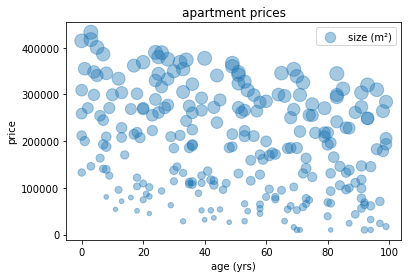

In [2]:
plt.scatter(ages, prices, s=sq_mtrs, alpha = 0.4)
plt.xlabel('age (yrs)')
plt.ylabel('price')
plt.legend(["size (m²)"])
plt.title("apartment prices");

# Part 2: standardize predictors and compare regression results

We will show a change of coefficients and the intercepts (refer now to the mean values instead of the zero values), but the errors will stay the same.

In [34]:
# defining the function

def get_z_scores(x):
    """Computes z-scores.
    
    Parameters
    ----------
    x : array-like
        An array like object containing the sample data.

    Returns
    -------
    zscores : array_like
        The z-scores, standardized by mean and standard deviation of
        input array `x`.
    """
    
    return (x - np.mean(x))/np.std(x)

# standardize predictors

ages_z = get_z_scores(ages)
sq_mtrs_z = get_z_scores(sq_mtrs)

# compare regression results with both predictors

coeff, total_error = my_mult_regr(ages, sq_mtrs, prices)
print("Previous result without standardizing:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error = my_mult_regr(ages_z, sq_mtrs_z, prices)
print("\n\nResult with standardized predictors:\n\nb_0:",coeff[0],"\nb_1:",coeff[1],"\nb_2:",coeff[2],"\n\nTotal error:", format(total_error,"e"))

Previous result without standardizing:

b_0: 31459.331531585663 
b_1: -1017.3116217627372 
b_2: 1988.9998687408017 

Total error: 2.438921e+10


Result with standardized predictors:

b_0: 192675.07722703886 
b_1: -29502.703818732687 
b_2: 103382.88383644939 

Total error: 2.438921e+10


## age as the only predictor

In [35]:
# compare regression results for predictor age

coeff, total_error, _, _ = linalg.lstsq(ages[:, np.newaxis]**[0, 1], prices)
print("Result without standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error, _, _ = linalg.lstsq(ages_z[:, np.newaxis]**[0, 1], prices)
print("\n\nResult with standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

Result without standardization:

b_0: 244965.82035361373 
b_1: -1051.535214096182 

Total error: 2.696148e+12


Result with standardization:

b_0: 192675.07722703888 
b_1: -30495.21042794371 

Total error: 2.696148e+12


## square meters as the only predictor

In [36]:
# compare regression results for predictor sq_mtrs

coeff, total_error, _, _ = linalg.lstsq(sq_mtrs[:, np.newaxis]**[0, 1], prices)
print("Result without standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

coeff, total_error, _, _ = linalg.lstsq(sq_mtrs_z[:, np.newaxis]**[0, 1], prices)
print("\n\nResult with standardization:\n\nb_0:", coeff[0],"\nb_1:", coeff[1],"\n\nTotal error:", format(total_error,"e"))

Result without standardization:

b_0: -19709.81513593851 
b_1: 1994.4490680919669 

Total error: 2.419715e+11


Result with standardization:

b_0: 192675.07722703888 
b_1: 103666.11861809864 

Total error: 2.419715e+11


# Part 3: car price simulation  

price as a function of age

In [37]:
# given values
mean_price_new = 30_000
sd_price = 10_000
n = 200
age_lower = 0
age_upper = 70

## Finding a function and coefficients for a realistic curve

To fiddle with the values of the function, we could also create numpy arrays, but we chose to use the sympy package as it seems perfect for the task.

https://www.sympy.org

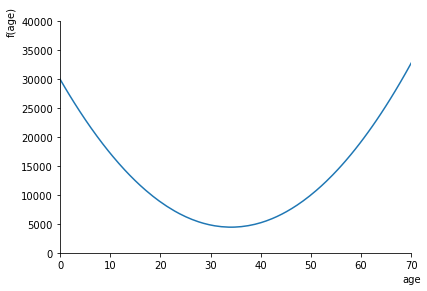

In [38]:
import sympy as spy

age, price_func = spy.symbols("age value")

b_0 = mean_price_new # avg value at age = 0
b_1 = -1500 # value loss per year
b_2 = 22 # value gain per year*year

price_func = b_0 + b_1 * age + b_2 * age**2

spy.plot(price_func,(age, 0, 70),xlim=(0,70),ylim=(0,40_000),axis_center=(0,0));

### Check if minimum is realistic: It is where derivative is 0

Derivative of price for age

In [39]:
d_age = spy.diff(price_func,age)
d_age

44*age - 1500

Age at minimum value

In [40]:
age_min = float(spy.solve(d_age)[0])
age_min

34.09090909090909

Minimum value

In [41]:
price_min = float(price_func.evalf(subs={age:age_min}))
price_min

4431.818181818182

## Create simulated data from function

Let's remember the price function from before

In [42]:
price_func

22*age**2 - 1500*age + 30000

That means function for one datapoint is:

$price = price_{mean} - 1500age + 22age² + error$

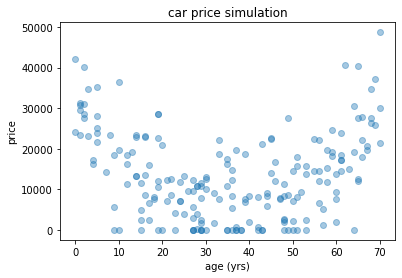

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# creating ages array (uniformly distributed)
ages = np.random.randint(age_lower,age_upper+1,n)

# error array
err = np.random.normal(0, scale = sd_price, size=n)

# prices array
prices = np.array([b_0 + b_1 * ages[i] + b_2 * ages[i]**2 + err[i] for i in range(n)])

# limit lowest price to 0
prices = np.where(prices<0, 0, prices)

plt.scatter(ages,prices, alpha=0.4)
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.title("car price simulation");

## Fit 3 regression models to the simulated data
  

print the obtained residual error for the three models and visualize the model predictions

### 1. intercept + linear predictor $age$

using `linalg.lstsq`

In [44]:
from scipy import linalg

# adding required column of ones to the predictor variable (because of matrix- vector multiplication)
ages_ = np.stack([ages,np.ones(n)], axis=1)

coeff,total_error,_,_ = linalg.lstsq(ages_,prices)
price_pred_1 = np.array([coeff[1] + coeff[0] * ages[i] for i in range(n)])

print("total error (scipy.linalg):",format(total_error,"e"))
print("intercept b_0 =",coeff[1])
print("slope b_1 =",coeff[0])

total error (scipy.linalg): 2.252337e+10
intercept b_0 = 13894.384365471751
slope b_1 = -12.697556465724162


In [45]:
res = (price_pred_1 - prices)**2
total_error_1 = np.sum(res)
print("total error (manually calculated):",format(total_error_1,"e"))

total error (manually calculated): 2.252337e+10


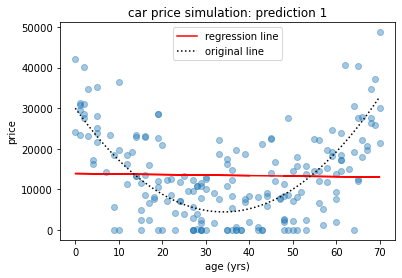

In [46]:
polyline = np.linspace(age_lower, age_upper)
prices_orig = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline]

plt.scatter(ages,prices, alpha=0.4)
plt.plot(ages,price_pred_1, c="red",label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.legend()
plt.title("car price simulation: prediction 1");

### 2. intercept + linear predictor $age$ + quadratic predictor $age²$

using `np.polyfit`

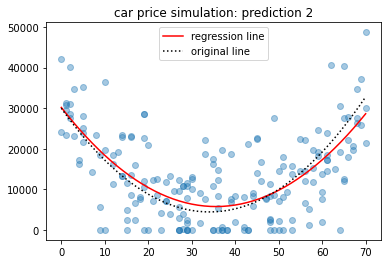

In [47]:
model_2 = np.poly1d(np.polyfit(ages, prices, 2))

price_reg_2 = model_2(polyline)

plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, price_reg_2, c="red",label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.legend()
plt.title("car price simulation: prediction 2");
plt.show()

In [48]:
print("intercept b_0 =",model_2[0])
print("slope b_1 =",model_2[1])
print("slope b_2 =",model_2[2])

intercept b_0 = 30190.622218960885
slope b_1 = -1373.4803123520287
slope b_2 = 19.303112688508556


In [49]:
price_pred_2 = model_2(ages)
res_2 = (price_pred_2 - prices)**2
total_error_2 = np.sum(res_2)
print("total error (manually calculated):",format(total_error_2,"e"))

total error (manually calculated): 1.206680e+10


### 3. intercept + linear predictor $age$ + quadratic predictor $age^2$ + cubic predicor $age³$

using `np.polyfit`

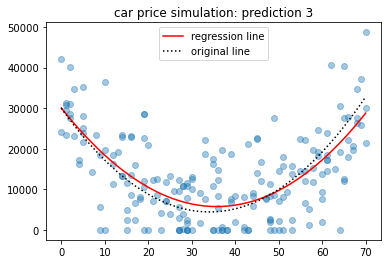

In [50]:
model_3 = np.poly1d(np.polyfit(ages, prices, 3))

price_reg_3 = model_3(polyline)

plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, price_reg_3, c="red", label = "regression line")
plt.plot(polyline, prices_orig, c="black", label="original line", linestyle=":")
plt.legend()
plt.title("car price simulation: prediction 3");
plt.show()

In [51]:
print("intercept b_0 =",model_3[0])
print("slope b_1 =",model_3[1])
print("slope b_2 =",model_3[2])
print("slope b_3 =",model_3[3])

intercept b_0 = 30048.103144295455
slope b_1 = -1347.9154931146059
slope b_2 = 18.374564774566945
slope b_3 = 0.00890919463676863


In [52]:
price_pred_3 = model_3(ages)
res_3 = (price_pred_3 - prices)**2
total_error_3 = np.sum(res_3)
print("total error (manually calculated):",format(total_error_3,"e"))

total error (manually calculated): 1.206607e+10


# Bonus: reliability of regression analysis

Jozsef Arató:

*"since we created the data, we can see how close are the true values to the 'generative' model next task is to systematically investigate this relationship you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters.*

*this task is somewhat analogous to the t-test simulation task"*


In [53]:
# permutation with number of datapoints (so far it was 200)
# and error (standard deviation was 10_000)
# if it's analogous to the t-test simulation task
# I'd expect we should plot again this kind of heatmap
# with x for n and y for standard deviation

# remember -> each pixel represented the proportion of significant cases out of 1_000 simulations
# so far we only saw 1 simulation ... meaning we should repeat it 1_000 and also vary error and n
#
# what could mean "significant" here?
# mean difference between price in original line and price of regression line?
# or the total error?

# so, we were not quite sure what exactly it was we had to do here.

# one way of solving that could be to calculate the total error between the original line and the regression line

In [54]:
def sim_error(n_points, sd, n_sims=10):
    """
    function for simulating total errors between regression line and original line
    of the quadratic function (we omit the other models).
    
    Parameters
    ----------
    n_points : int
        Number of data points.
    sd : float
        Standard deviation.
    n_sim int
        Number of simulations (Default = 10)

    Returns
    -------
    list-like
        List of the total mean errors of all simulations.
    """
    age_lower = 0 # fixed values
    age_upper = 70

    total_errors = list()

    for i in range(n_sims):

        ages_sim = np.random.randint(age_lower,age_upper+1,n_points)
        err_sim = np.random.normal(0, scale = sd, size=n_points)
        prices_sim = np.array([b_0 + b_1 * ages_sim[i] + b_2 * ages_sim[i]**2 + err_sim[i] for i in range(n_points)])
        prices_sim = np.where(prices_sim<0, 0, prices_sim)

        polyline_sim = np.linspace(age_lower, age_upper)
        prices_orig_sim = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline_sim]

        model_sim = np.poly1d(np.polyfit(ages_sim, prices_sim, 2))
        price_reg_sim = model_sim(polyline_sim)

        res_sim = (price_reg_sim - prices_orig_sim)**2
        total_error_sim = np.sum(res_sim)
        total_errors.append(total_error_sim)

    total_error_mean = np.mean(total_errors)
    
    return total_error_mean

n_space = range(50,600, 50)
sd_space = range(100,30_000,4_000)

n_cases_sim = n_space[0]
sd_sim = sd_space[0]

results_arr=np.zeros((len(sd_space),len(n_space)))  

print("Number of permutations:",np.size(results_arr))

Number of permutations: 88


CPU times: user 2min 16s, sys: 1.91 s, total: 2min 18s
Wall time: 36.2 s


Text(0.5, 1.0, 'total errors original vs regression line')

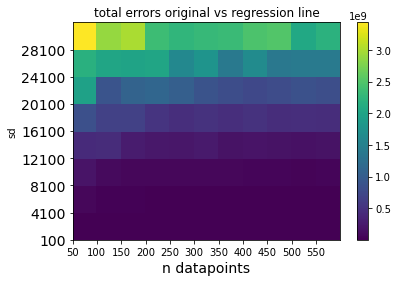

In [55]:
%%time

n_sim = 20 # would be better with a higher number, but it takes very long

for i_sd,sd in enumerate(sd_space):
    for i_n,n in enumerate(n_space):
        results_arr[i_sd,i_n]=sim_error(n,sd,n_sim)

plt.pcolor(results_arr)
plt.xticks(np.arange(len(n_space)),n_space)
plt.xlabel('n datapoints',fontsize=14)
plt.yticks(np.arange(len(sd_space)),sd_space,fontsize=14)
plt.ylabel('sd')

plt.colorbar()
plt.title('total errors original vs regression line');

**what you can see: high standard deviation and low number of data points -> less precise**

**2 Examples:**



In [56]:
def sim_curves(n_points, sd):
    
    """
    Function for plots and text output for a specific constellation
    of number of data points and standard deviation. Only for demonstrating some examples.
    
    Parameters
    ----------
    n_points : int
        Number of data points.
    sd : float
        Standard deviation.

    Returns
    -------
    None.
    """

    age_lower = 0 # hardcoded values
    age_upper = 70 # ...


    ages_sim = np.random.randint(age_lower,age_upper+1,n_points)
    err_sim = np.random.normal(0, scale = sd, size=n_points)
    prices_sim = np.array([b_0 + b_1 * ages_sim[i] + b_2 * ages_sim[i]**2 + err_sim[i] for i in range(n_points)])
    prices_sim = np.where(prices_sim<0, 0, prices_sim)

    polyline_sim = np.linspace(age_lower, age_upper)
    prices_orig_sim = [float(price_func.evalf(subs={age:age_i})) for age_i in polyline_sim]

    model_sim = np.poly1d(np.polyfit(ages_sim, prices_sim, 2))
    price_reg_sim = model_sim(polyline_sim)

    res_sim = (price_reg_sim - prices_orig_sim)**2
    total_error_sim = np.sum(res_sim)
    
    plt.scatter(ages_sim, prices_sim, alpha=0.4)
    plt.plot(polyline_sim, price_reg_sim, c="red",label = "regression line")
    plt.plot(polyline_sim, prices_orig_sim, c="black", label="original line", linestyle=":")
    plt.legend()
    plt.title("car price simulation: regression 2");
    plt.show()
    
    print("total error:",format(total_error_sim,"e"))
    
    return None

#### High error: few points, high standard deviation

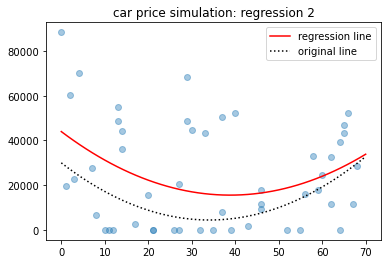

total error: 5.845330e+09


In [57]:
n_points = 50
sd = 25_000

sim_curves(n_points, sd)

#### Low error: many points, low standard deviation

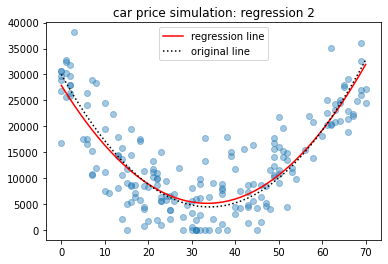

total error: 3.015523e+07


In [58]:
n_points = 200
sd = 5_000

sim_curves(n_points, sd)

In [29]:
# error measure could be improved ... is now absolute squared error (not really comparable),
# could be turned into MSE or RMSE for better comparability